# Coletar e inserir o arquivo custo_diaria.csv na plataforma

In [1]:
import pandas as pd

In [9]:
df = pd.read_csv("/content/custo_diaria.csv",sep=";")

In [51]:
df.head(30)

,qtd_pessoas,valor_diaria
0,1,150
1,3,200
2,4,650
3,6,499
4,7,549
5,10,980
6,12,700
7,13,735
8,15,859
9,16,900


#  Analisar os dados coletados

1. Analisar informações das colunas


In [11]:
df.info()
#Não existe valores nulos
#Todos os dados são numéricos e discretos
#Possui apenas 2 colunas, o que torna inviavel análises de correlação multivarial

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   qtd_pessoas   30 non-null     int64
 1   valor_diaria  30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


2. Analises estatisticas simples

In [12]:
df.describe()

,qtd_pessoas,valor_diaria
count,30.000000,30.000000
mean,28.600000,1648.633333
std,18.189804,950.522197
min,1.000000,150.000000
25%,13.500000,869.250000
50%,26.000000,1627.500000
75%,44.500000,2497.000000
max,60.000000,3300.000000


In [43]:
df['qtd_pessoas'].std() # desvio padrão
df['qtd_pessoas'].mean() # media
df.corr() # correlação

,qtd_pessoas,valor_diaria
qtd_pessoas,1.000000,0.978666
valor_diaria,0.978666,1.000000


3. Por possuir poucos dados, vou usar um gráfico normal para ver o comportamento das variáveis

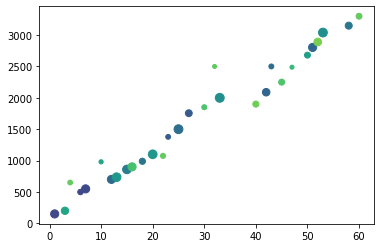

In [14]:
import matplotlib.pyplot as plt
import numpy as np
x = df['qtd_pessoas']
y = df['valor_diaria']
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))
fig, ax = plt.subplots()
ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)
plt.show()
#Fica evidente que as varuvaveis possuem uma alta correlação, isso não necessariamente significa causalidade
#Por existir apenas 2 variaveis, não é necessário fazer outro tipo de análise, como mapas de calor

# Criar algoritmo de regressão linear

1. Gerar um input_layer

In [54]:
x = df['qtd_pessoas']
y = df['valor_diaria']
input = list()
for input_qtd_pessoas in x:
  input.append([input_qtd_pessoas])
outp = list()
for outp_ in y:
  outp.append(outp_)

2. Criar o modelo de regressão

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(input, outp)
reg.score(input, outp)
#reg.intercept_ # intercept da previsão
#reg.coef_ # coeficiente angular
#reg.predict([[27]])

0.9577871649322629

3. Obter métricas

In [73]:
y_true = df['valor_diaria'].values
y_true = y_true.tolist()
x_data = df['qtd_pessoas'].values
x_data = x_data.tolist()
y_predict = list()
for x in x_data:
  y_predict.append(reg.predict([[x]])[0])

In [ ]:
y_predict

In [77]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mean_absolute_error(y_true,y_predict)
mean_squared_error(y_true,y_predict)

36867.67840031127